# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [169]:
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import compose
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

#from sklearn.utils import class_weight
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, AffinityPropagation

# Mutliple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plots for retina screens
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [170]:
mall_df = pd.read_csv('../data/db_Mall.csv')
#mall_df.set_index('CustomerID', inplace=True)
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [171]:
# Hand encoding of categorical data
mall_df.loc[mall_df.Gender == 'Male', 'Gender'] = 0
mall_df.loc[mall_df.Gender == 'Female', 'Gender'] = 1

X = mall_df.drop(['CustomerID'], axis=1)

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

### KMeans

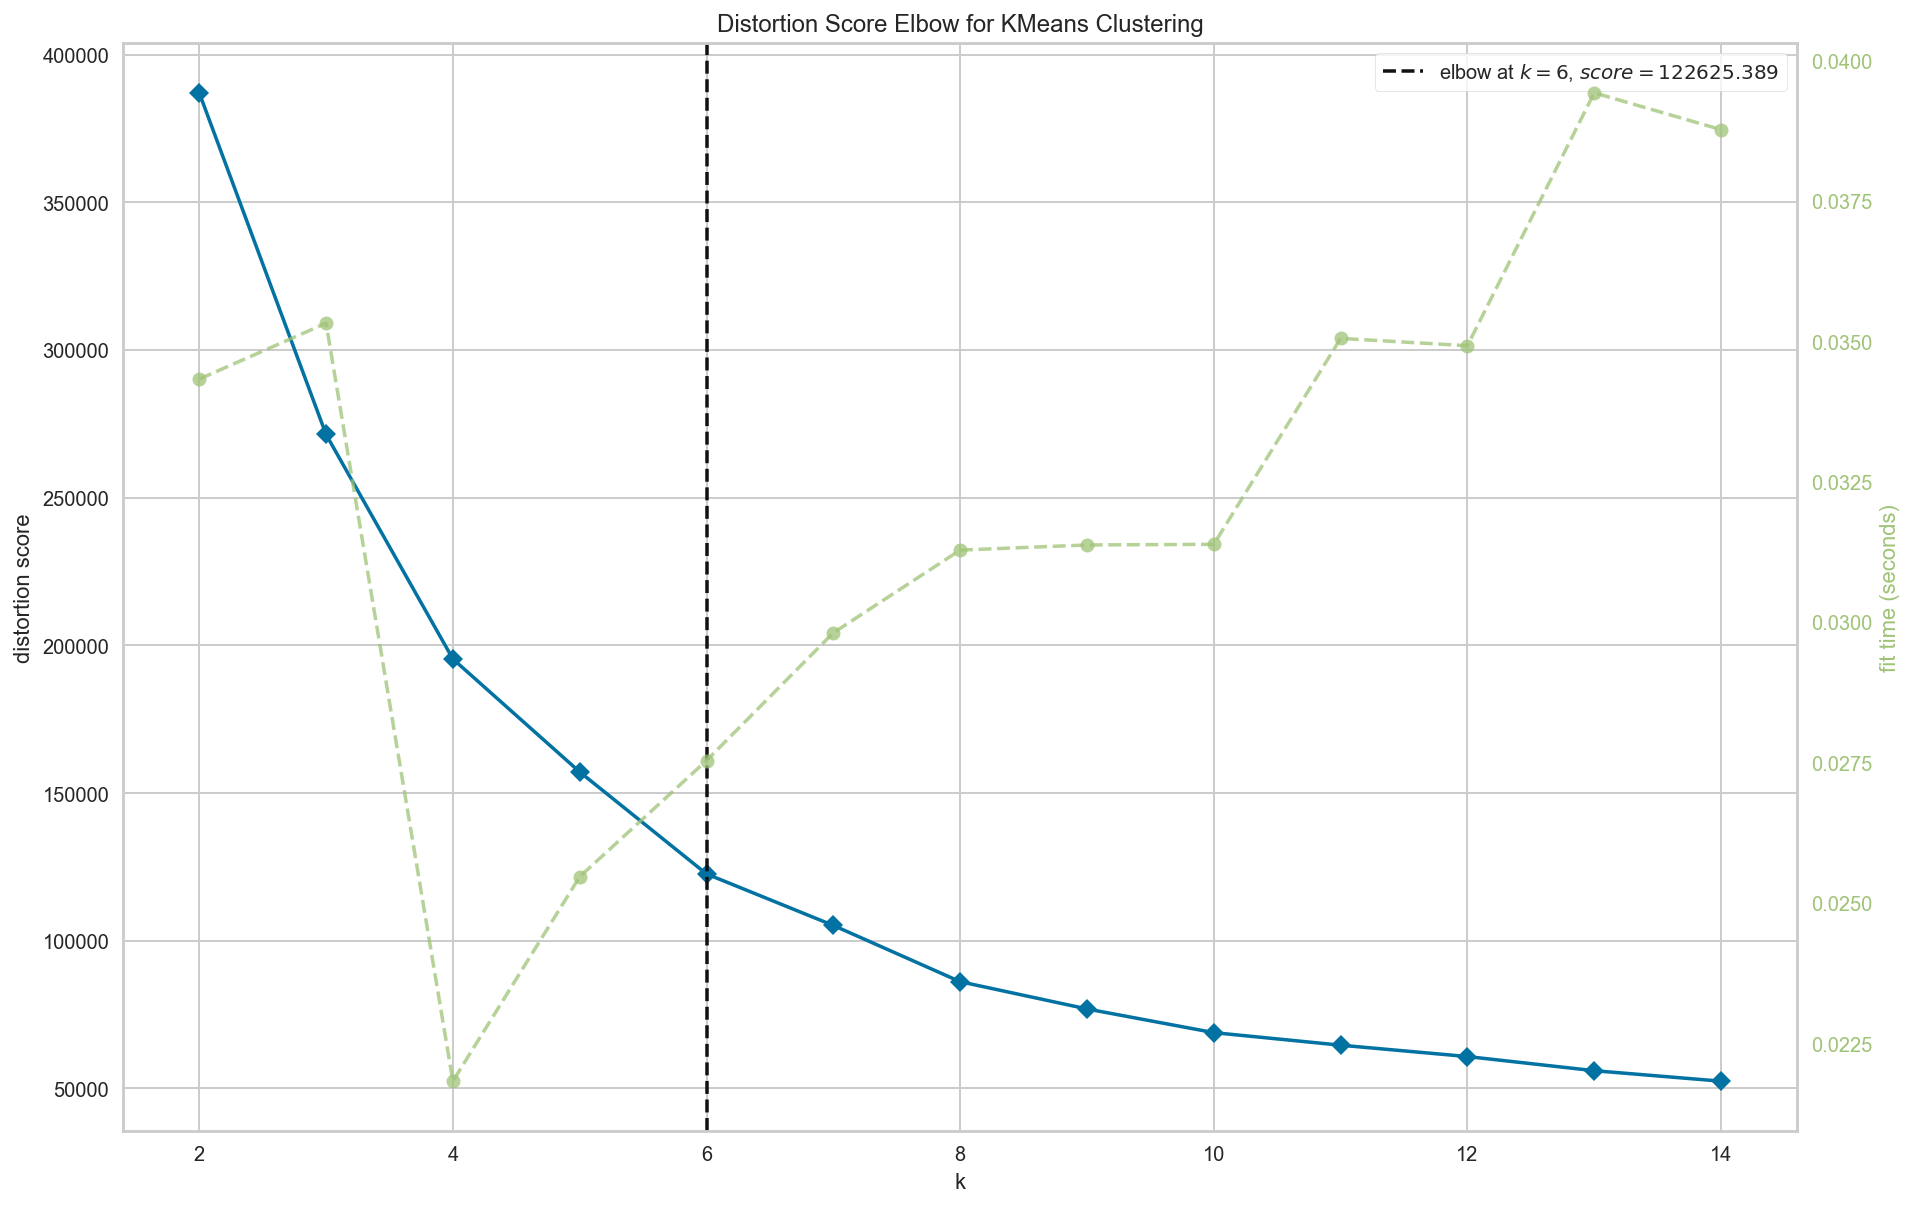

In [174]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.features import RadViz

visualizer = RadViz(size=(1080, 720))

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(mall_df)
visualizer.show();

KMeans(n_clusters=6)

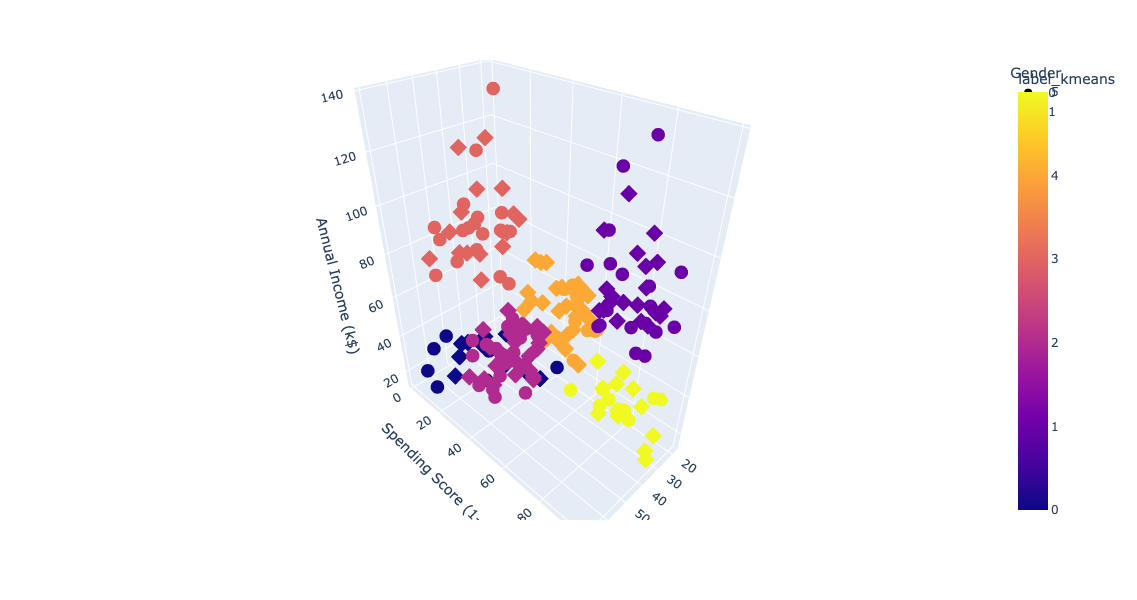

In [176]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(data = X, columns = X.columns)
df_kmeans['label_kmeans'] = labels

fig = px.scatter_3d(df_kmeans, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',
              color='label_kmeans', symbol='Gender', width=1200, height=600)

fig.show()

In [202]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    pd.DataFrame(df_kmeans.groupby(by='label_kmeans').describe())

Age                                                        \
             count       mean        std   min    25%   50%    75%   max   
label_kmeans                                                               
0             21.0  44.142857  13.089254  19.0  35.00  45.0  53.00  67.0   
1             39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
2             45.0  56.155556   8.543886  43.0  49.00  54.0  65.00  70.0   
3             35.0  41.685714  10.897305  19.0  35.00  43.0  47.50  59.0   
4             38.0  27.000000   7.032742  18.0  21.00  26.5  31.75  40.0   
5             22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

             Annual Income (k$)                                           \
                          count       mean        std   min    25%   50%   
label_kmeans                                                               
0                          21.0  25.142857   7.226934  15.0  19.00  24.0   
1                          39.0  86.538462  16.312485  69.0  75.50  79.0   
2                          45.0  53.377778   8.435016  38.0  47.00  54.0   
3                          35.0  88.228571  16.367266  71.0  77.50  85.0   
4                          38.0  56.657895   9.905708  39.0  48.00  59.5   
5                          22.0  25.727273   7.566731  15.0  19.25  24.5   

                           Spending Score (1-100)                              \
                75%    max                  count       mean        std   min   
label_kmeans                                                                    
0             30.00   39.0                   21.0  19.523810  12.769569   3.0   
1             95.00  137.0                   39.0  82.128205   9.364489  63.0   
2             62.00   67.0                   45.0  49.088889   6.251626  35.0   
3             97.50  137.0                   35.0  17.285714  10.211215   1.0   
4             63.75   76.0                   38.0  49.131579   7.853975  29.0   
5             32.25   39.0                   22.0  79.363636  10.504174  61.0   

                                       
               25%   50%    75%   max  
label_kmeans                           
0              6.0  15.0  31.00  40.0  
1             74.5  83.0  90.00  97.0  
2             45.0  49.0  55.00  60.0  
3             10.0  16.0  23.50  39.0  
4             42.0  50.0  55.00  61.0  
5             73.0  77.0  85.75  99.0

### AffinityPropagation

In [182]:
af = AffinityPropagation(random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 12
